In [15]:
%load_ext autoreload
%autoreload 2

import text3d2video.wandb_util as wu
from text3d2video.artifacts.vertex_atributes_artifact import VertAttributesArtifact
from text3d2video.artifacts.animation_artifact import AnimationArtifact

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
features_3d_artifact_tag = 'deadpool-3d-features:latest'
animation_tag = 'rumba:latest'

features_3d = wu.get_artifact(features_3d_artifact_tag)
features_3d = VertAttributesArtifact.from_wandb_artifact(features_3d)
mv_features = features_3d.get_mv_features_from_lineage()

animation = wu.get_artifact(animation_tag)
animation = AnimationArtifact.from_wandb_artifact(animation)

wandb: Downloading large artifact deadpool-3d-features:latest, 1375.15MB. 32 files... 
wandb:   32 of 32 files downloaded.  
Done. 0:0:0.6
wandb: Downloading large artifact deadpool-mv-features:v7, 592.93MB. 298 files... 
wandb:   298 of 298 files downloaded.  
Done. 0:0:1.1
wandb: Downloading large artifact rumba:latest, 121.09MB. 61 files... 
wandb:   61 of 61 files downloaded.  
Done. 0:0:0.4


In [17]:
from scripts.generate_video import render_feature_images

# render all feature images
all_feature_images = render_feature_images(
    features_3d,
    mv_features,
    animation,
    animation.frame_nums(sample_n=8)
)

/home/jorge/thesis/text3d2video/multidict.py:83: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  value = load_fun(folder / f)
/home/jorge/miniconda3/envs/thesis/lib/python3.8/

Bin size was too small in the coarse rasterization phase. This caused an overflow, meaning output may be incomplete. To solve, try increasing max_faces_per_bin / max_points_per_bin, decreasing bin_size, or setting bin_size to 0 to use the naive rasterization.Bin size was too small in the coarse rasterization phase. This caused an overflow, meaning output may be incomplete. To solve, try increasing max_faces_per_bin / max_points_per_bin, decreasing bin_size, or setting bin_size to 0 to use the naive rasterization.Bin size was too small in the coarse rasterization phase. This caused an overflow, meaning output may be incomplete. To solve, try increasing max_faces_per_bin / max_points_per_bin, decreasing bin_size, or setting bin_size to 0 to use the naive rasterization.Bin size was too small in the coarse rasterization phase. This caused an overflow, meaning output may be incomplete. To solve, try increasing max_faces_per_bin / max_points_per_bin, decreasing bin_size, or setting bin_size 

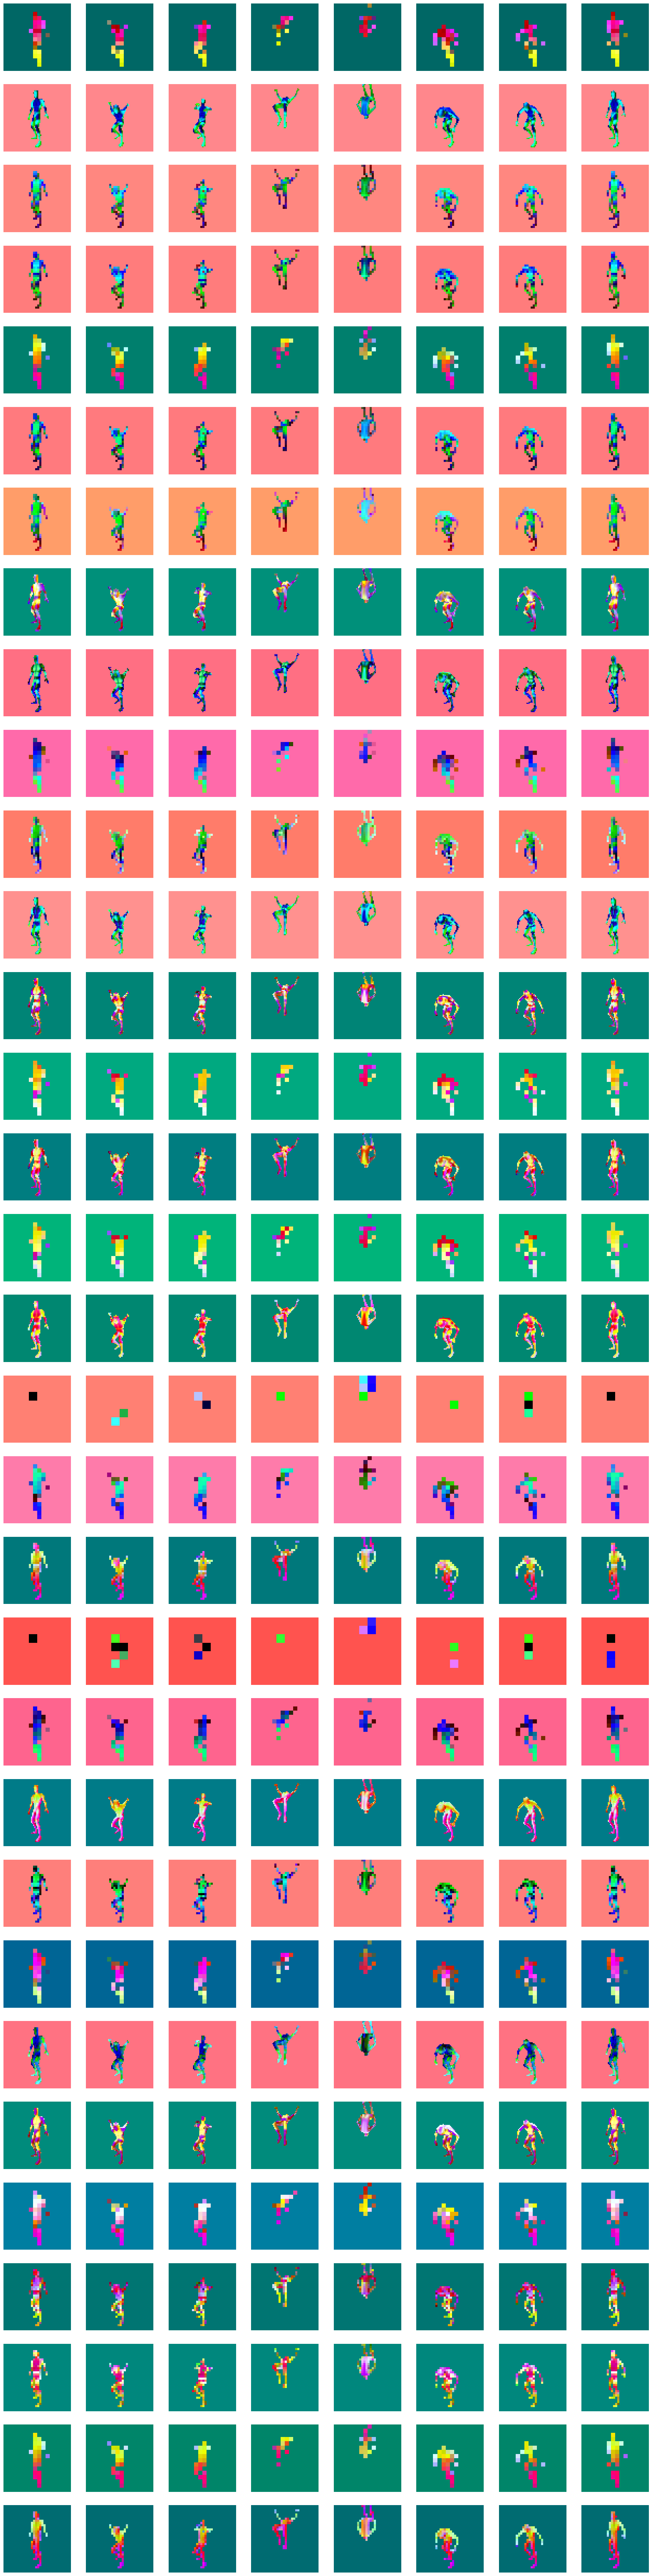

In [18]:
from einops import rearrange

from text3d2video.ipython_utils import display_ims
from text3d2video.visualization import RgbPcaUtil
import matplotlib.pyplot as plt

n_frames = all_feature_images.values()[0].shape[0]

n_rows = len(all_feature_images.keys())
n_cols = n_frames

scale = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * scale, n_rows * scale))

for row_i, (identifier, feature_images) in enumerate(all_feature_images.items()):
    features_flat = rearrange(feature_images, "b c h w -> (b h w) c")
    pca = RgbPcaUtil.init_and_fit(features_flat.cpu())
    rgb_feature_images_pil = [
        pca.feature_map_to_rgb_pil(feature_image)
        for feature_image in feature_images.cpu()
    ]

    for col_i, rgb_feature_image_pil in enumerate(rgb_feature_images_pil):
        axs[row_i, col_i].imshow(rgb_feature_image_pil)
        axs[row_i, col_i].axis('off')
